<h1>Geometric Properties of Binary Images</h1>

source: [Geometric Properties | Binary Images](https://fpcv.cs.columbia.edu/)

---

In [24]:
from matplotlib import pyplot as plt
from PIL import Image
import cv2 as cv
import numpy as np
import imutils

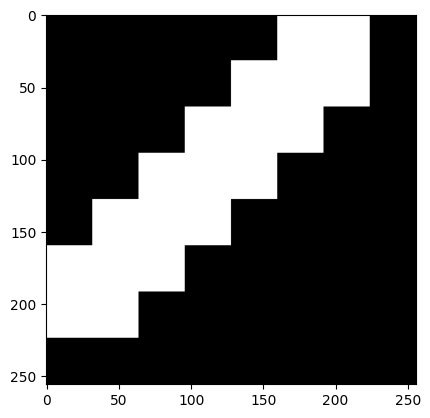

In [25]:
#Image prep
data = [[1, 1, 1, 1, 1, 0, 0, 1],
		[1, 1, 1, 1, 0, 0, 0, 1],
		[1, 1, 1, 0, 0, 0, 1, 1],
		[1, 1, 0, 0, 0, 1, 1, 1],
		[1, 0, 0, 0, 1, 1, 1, 1],
		[0, 0, 0, 1, 1, 1, 1, 1],
		[0, 0, 1, 1, 1, 1, 1, 1],
		[1, 1, 1, 1, 1, 1, 1, 1]]

row, col = len(data), len(data[0])
for i in range(row):
    for j in range(col):
        data[i][j] = int(not data[i][j])

image = Image.new('1', (8,8))
pixels = image.load()

for i in range(image.size[0]):
    for j in range(image.size[1]):
       pixels[j, i] = data[i][j]

image.save("data/bin0.bmp")

#Resizing
SIZE = 256
image = cv.imread('data/bin0.bmp', cv.IMREAD_GRAYSCALE)
resized = imutils.resize(image, width=SIZE)
resized = resized.tolist()

row, col = len(resized), len(resized[0])
for i in range(row):
    for j in range(col):
        if(resized[i][j]!=255):
            resized[i][j] = 0
        else:
            resized[i][j] = 1

image = Image.new('1', (256,256))
pixels = image.load()

for i in range(image.size[0]):
    for j in range(image.size[1]):
       pixels[j, i] = resized[i][j]

image.save("data/bin0.bmp")
plt.imshow(resized, cmap="gray")

In [26]:
#Getting area
# Assuming the image contains only a single object, the area of that object would simply the sum of the binary image
data = resized
area = 0
row, col = len(data), len(data[0])
for i in range(row):
    for j in range(col):
        area+=data[i][j]
print("Area:",area)

Area: 19456


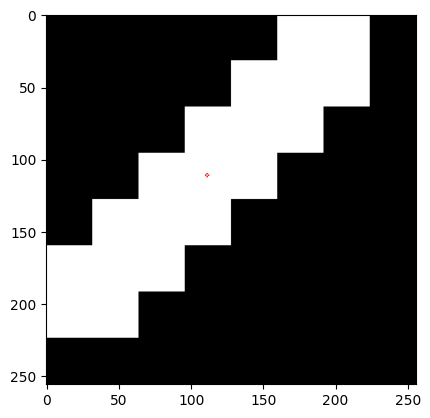

In [27]:
#Centre of Mass
# The calculation of centre lies on a physical concept. That's not the focus of this so I'll just use the equations that are given.
row, col = len(data), len(data[0])
yhat,xhat=0,0
for i in range(row):
    for j in range(col):
        yhat+= j *data[i][j]

for i in range(row):
    for j in range(col):
        xhat+= i*data[i][j]

yhat//=area
xhat//=area

img = cv.imread("data/bin0.bmp")
cv.circle(img, (yhat, xhat),radius=1, color=(255,0,0))
plt.imshow(img, cmap="gray")

## Getting Orientation
Defining an orientation of an object is not as straightforward as the other two properties. It is similar to centre of mass however in that it lies on a concept in physics called second moment. In particular, we define the orientation as the axes of least second moment because depending on the object's orientation, the axis may also be different (To reason, depending on how an object is placed, only one particular direction can be defined that will require your most effort to apply torque on that object). The mathematics of the matter however I will leave alone. 

Please refer to the source for a high-level ideas of the stuff being calculated here

In [28]:
#Calculating a, b, and c wrt to origin
img = cv.imread("data/bin0.bmp",cv.IMREAD_GRAYSCALE)
a_prime, b_prime, c_prime = 0,0,0
row,col = img.shape

for i in range(row):
    for j in range(col):
        a_prime+= (i**2) * img[i][j]
        b_prime+= i * j * img[i][j]
        c_prime+= (j**2) * img[i][j]

a_prime, b_prime, c_prime

(79750356480, 45636660480, 79750356480)

The derivation

![pdf](data/derivation1-1.png)

In [29]:
#The actual a,b,c values

#Area
area = 0
row, col = len(img), len(img[0])
for i in range(row):
    for j in range(col):
        area+=img[i][j]

#centre
row, col = len(img), len(img[0])
yhat,xhat=0,0
for i in range(row):
    for j in range(col):
        yhat+= j * img[i][j]
yhat/=area

for i in range(row):
    for j in range(col):
        xhat+= i * img[i][j]
xhat/=area

a = a_prime - area * (xhat**2)
b = 2 * (b_prime - area * xhat * yhat)
c = c_prime - area * (yhat**2)

a,b,c

(18070483200.0, -32086425600.0, 18070483200.0)

In [30]:
#Calculating theta for least moment
theta = np.arctan2(b, a-c)/2
theta

-0.7853981633974483

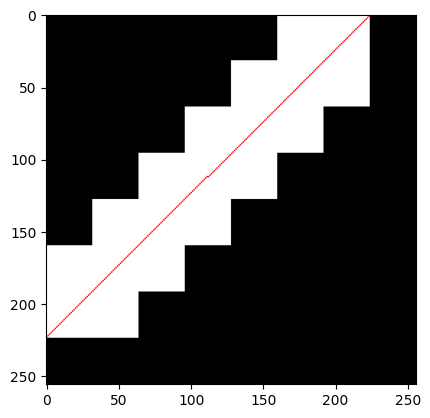

In [31]:
#The line
def line(theta, x):
    return int(np.tan(theta) * (x - xhat) + yhat)

img = cv.imread("data/bin0.bmp")
cv.line(img, (0, line(theta, 0)), (256, line(theta, 256)), color=(255,0,0))

plt.imshow(img)

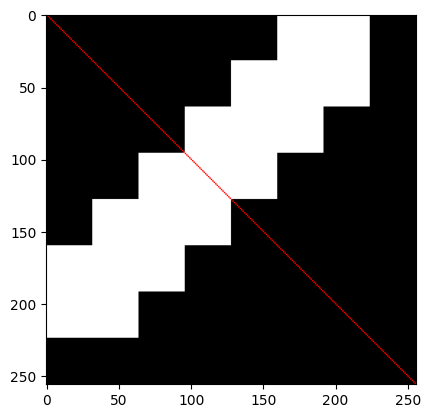

In [32]:
#The other line
theta = np.arctan2(b, a-c)/2 + np.pi/2

img = cv.imread("data/bin0.bmp")
cv.line(img, (0, line(theta, 0)), (256, line(theta, 256)), color=(255,0,0))

plt.imshow(img)

---
<h1>Messing around</h1>

In [33]:
def cvtBinary(path):
    image = cv.imread(path, cv.IMREAD_GRAYSCALE)
    resized = imutils.resize(image, width=SIZE)
    resized = resized.tolist()

    row, col = len(resized), len(resized[0])
    for i in range(row):
        for j in range(col):
            if(resized[i][j]!=255):
                resized[i][j] = 0
            else:
                resized[i][j] = 1
    
    return resized
    

def getBinaryImageArea(arr):
    area = 0
    row, col = len(arr), len(arr[0])

    for i in range(row):
        for j in range(col):
            area+=arr[i][j]
    
    return area

def getBinaryImageCentre(arr, area):
    row, col = len(arr), len(arr[0])
    yhat,xhat=0,0
    for i in range(row):
        for j in range(col):
            yhat+= j * arr[i][j]

    for i in range(row):
        for j in range(col):
            xhat+= i * arr[i][j]

    return (xhat/area, yhat/area)

def getImageOrientation(img, area, xhat, yhat):
    a_prime, b_prime, c_prime = 0,0,0
    row,col = len(img), len(img[0])

    for i in range(row):
        for j in range(col):
            a_prime+= (i**2)*img[i][j]
    a_prime

    for i in range(row):
        for j in range(col):
            b_prime+= i * j * img[i][j]
    b_prime

    for i in range(row):
        for j in range(col):
            c_prime+= (j**2)*img[i][j]
    c_prime

    a = a_prime - area * (xhat**2)
    b = 2 * (b_prime - area * xhat * yhat)
    c = c_prime - area * (yhat**2)
    
    return np.arctan2(b, a-c)/2, a, b, c

def line(theta, x):
    return int(np.tan(theta) * (x - xhat) + yhat)


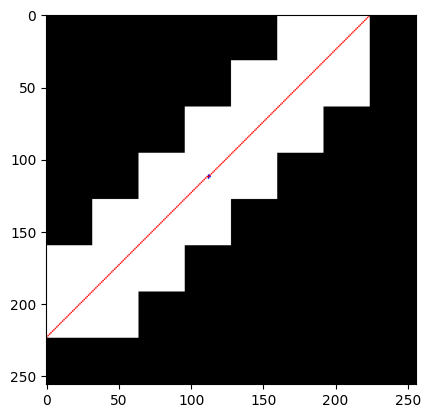

In [34]:
#Example
SIZE = 256

img = cvtBinary("data/bin0.bmp")
area = getBinaryImageArea(img)
xhat, yhat = getBinaryImageCentre(img, area)
theta, a, b, c= getImageOrientation(img, area, xhat, yhat)


img = cv.imread("data/bin0.bmp")
cv.circle(img, (round(yhat), round(xhat)),radius=1, color=(0,0,255),thickness=1)
cv.line(img, (0, line(theta, 0)), (SIZE, line(theta, SIZE)), color=(255,0,0))

plt.imshow(img, cmap="gray")

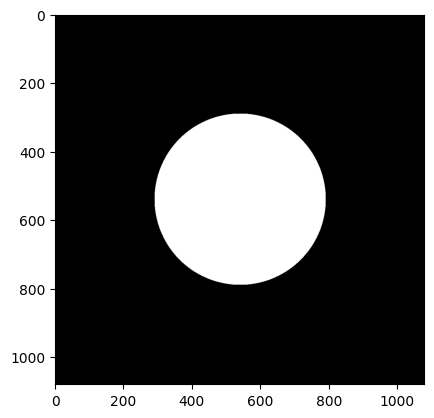

In [35]:
#Generate 1080x1080 binary Circle
SIZE = 1080
RADIUS = 250

img = []
for i in range(SIZE):
    temp = []
    for j in range(SIZE):
        temp.append(0)
    img.append(temp)

center = (SIZE//2, SIZE//2)

for i in range(SIZE):
    for j in range(SIZE):
        if (i - center[0])**2 + (j - center[1])**2 <= RADIUS**2:
            img[i][j] = 1

image = Image.new('1', (SIZE,SIZE))
pixels = image.load()

for i in range(image.size[0]):
    for j in range(image.size[1]):
       pixels[j, i] = img[i][j]

image.save("data/bin_circle.bmp")
plt.imshow(img, cmap="gray")


Roundedness: 1.0


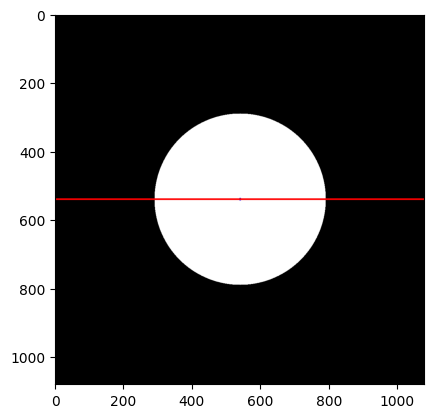

In [36]:
img = cvtBinary("data/bin_circle.bmp")
area = getBinaryImageArea(img)
xhat, yhat = getBinaryImageCentre(img, area)
theta, a, b ,c = getImageOrientation(img, area, xhat, yhat)


img = cv.imread("data/bin_circle.bmp")
cv.circle(img, (int(yhat), int(xhat)),radius=1, color=(0,0,255),thickness=5)
cv.line(img, (0, line(theta, 0)), (SIZE, line(theta, SIZE)), color=(255,0,0), thickness=cv.LINE_4)

plt.imshow(img, cmap="gray")

#Calculating roundedness
def second_moment(a, b, c, theta):
    return a * (np.sin(theta)**2) - b * np.sin(theta) * np.cos(theta) + c * (np.cos(theta)**2)

E_min = second_moment(a,b,c,theta)
E_max = second_moment(a,b,c,theta + np.pi/2)

print("Roundedness:", E_min/E_max)